In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
d = np.random.randint(0, 25, size=(100, 2))
d

array([[ 9, 13],
       [ 5, 16],
       [16, 24],
       [23, 15],
       [ 5,  3],
       [12, 14],
       [18,  2],
       [ 4,  1],
       [14, 16],
       [10, 10],
       [15, 21],
       [18, 16],
       [13, 15],
       [ 1,  6],
       [ 7,  4],
       [16, 16],
       [ 2, 15],
       [ 7,  6],
       [24, 10],
       [ 7, 20],
       [ 3,  2],
       [ 0,  7],
       [23, 13],
       [15, 20],
       [22, 17],
       [16, 13],
       [11, 11],
       [15, 24],
       [ 3, 21],
       [24, 18],
       [23, 17],
       [11, 16],
       [11, 18],
       [13, 24],
       [18, 11],
       [ 9, 18],
       [16,  3],
       [22, 10],
       [ 6, 13],
       [17, 11],
       [ 5, 16],
       [ 7, 11],
       [ 0,  5],
       [22, 13],
       [11, 13],
       [ 9, 19],
       [13, 14],
       [ 0, 19],
       [ 0, 14],
       [ 6, 21],
       [16, 14],
       [ 5,  0],
       [ 6,  1],
       [16, 10],
       [ 8,  1],
       [13, 23],
       [17,  9],
       [ 7, 14],
       [15,  5

In [4]:
class KMeans(object):
    
    def __init__(self, data, k=5, n_iter=20):
        
        self.k = k
        self.data = data
        self.cluster_centers = np.zeros((k, data.shape[1]))
        self.sum_cluster_centers = np.zeros((k, data.shape[1]))
        self.n_iter = n_iter
        self.assigned_clusters = np.zeros(data.shape[0])
        self.shuffled_index = np.arange(data.shape[0])
        self.completed_iter = 0
        
    def fit(self):
        
        for i in range(self.n_iter):
            self._run_iteration()
        self.cluster_centers = self.sum_cluster_centers.astype('float32') / self.n_iter
        
    def predict(self, data):
        
        return self._minimum_distance(data)
        
    def _run_iteration(self):
        
        self._update_cluster_centers(initialize=True)
        self._assign_clusters()
    
    def _update_cluster_centers(self, initialize=False):
        
        if initialize:      # Initially, the 'k' clusters are initialized by 'k' random points from the data
            np.random.shuffle(self.shuffled_index)
            self.cluster_centers = self.data[self.shuffled_index[:self.k]]
        
        else:
            for i in range(self.k):
                self.cluster_centers[i] = np.mean(self.data[np.where(self.assigned_clusters==i)], axis=0)
            self._assign_clusters()
        
    def _assign_clusters(self):
        
        argmin_distance = self._minimum_distance(self.data)
        if (self.assigned_clusters == argmin_distance).all():
            self._return_results()
        else:
            self.assigned_clusters = argmin_distance
            self._update_cluster_centers()
        
    def _minimum_distance(self, data):
        
        num = data.shape[0]                # No. of data points
        distance_matrix = np.zeros(num * self.k).reshape(num, self.k)
        for i, cluster in enumerate(self.cluster_centers):
            distance = np.apply_along_axis(self._euclidean_distance, 1, data, cluster)
            distance_matrix[:,i] = distance
        distance_matrix = np.array(distance_matrix)
        return distance_matrix.argmin(axis=1)
        
    def _euclidean_distance(self, x1, x2):
        
        # Returns the Euclidean's Distance between two points, x1 and x2
        return np.sqrt(np.sum(np.square(x1 - x2)))
        
    def _return_results(self):
        
        self.completed_iter += 1
        self.sum_cluster_centers += self.cluster_centers
        self._reset()
        
    def _reset(self):
        
        self.cluster_centers = np.zeros((self.k, self.data.shape[1]))
        self.assigned_clusters = np.zeros(self.data.shape[0])

In [19]:
cluster = KMeans(data=d, k=3)
cluster.fit()
predictions = cluster.predict(d)

In [20]:
m = np.array(list(zip(d, predictions)))
m

array([[array([ 9, 13]), 1],
       [array([ 5, 16]), 0],
       [array([16, 24]), 1],
       [array([23, 15]), 1],
       [array([5, 3]), 0],
       [array([12, 14]), 1],
       [array([18,  2]), 2],
       [array([4, 1]), 0],
       [array([14, 16]), 1],
       [array([10, 10]), 2],
       [array([15, 21]), 1],
       [array([18, 16]), 1],
       [array([13, 15]), 1],
       [array([1, 6]), 0],
       [array([7, 4]), 0],
       [array([16, 16]), 1],
       [array([ 2, 15]), 0],
       [array([7, 6]), 0],
       [array([24, 10]), 2],
       [array([ 7, 20]), 1],
       [array([3, 2]), 0],
       [array([0, 7]), 0],
       [array([23, 13]), 1],
       [array([15, 20]), 1],
       [array([22, 17]), 1],
       [array([16, 13]), 1],
       [array([11, 11]), 1],
       [array([15, 24]), 1],
       [array([ 3, 21]), 0],
       [array([24, 18]), 1],
       [array([23, 17]), 1],
       [array([11, 16]), 1],
       [array([11, 18]), 1],
       [array([13, 24]), 1],
       [array([18, 11]), 2],

In [21]:
cluster.cluster_centers

array([[  7.6500001 ,   9.        ],
       [ 12.44999981,  10.75      ],
       [ 12.5       ,  10.25      ]], dtype=float32)

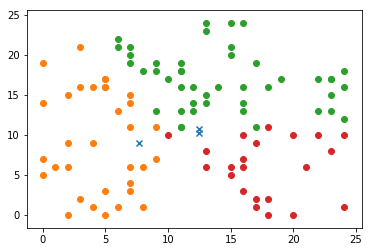

In [22]:
plt.scatter(cluster.cluster_centers[:,0], cluster.cluster_centers[:,1], marker='x')
for i in range(3):
    index = np.where(m[:,1] == i)
    plt.scatter(d[index][:,0], d[index][:,1])